# Chapter 9

In [1]:
import numpy as np
import pandas as pd

## %matplotlib inline

# 9.1 A Brief matplotlib API Primer

In [3]:
import matplotlib.pyplot as plt

In [4]:
data = np.arange(10)

In [5]:
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

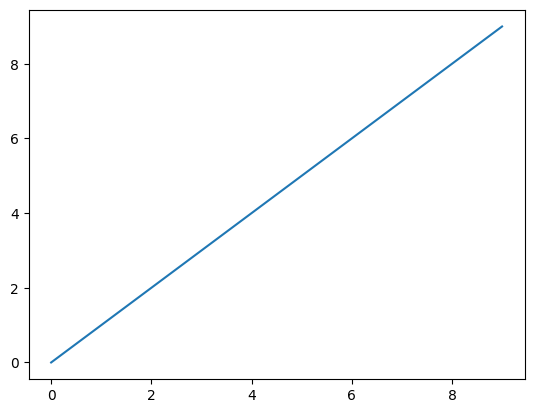

In [6]:
plt.plot(data)

## Figures and Subplots

In [7]:
fig =plt.figure()

<Figure size 640x480 with 0 Axes>

In [8]:
ax1 = fig.add_subplot(2, 2, 1)

In [9]:
ax2 = fig.add_subplot(2, 2, 2)

In [10]:
ax3 = fig.add_subplot(2, 2, 3)

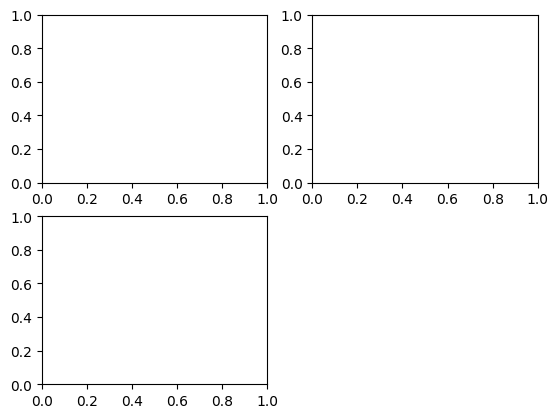

In [90]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

In [94]:
ax3.plot(np.random.standard_normal(50).cumsum(), color="black", linestyle="dashed")

In [95]:
ax1.hist(np.random.standard_normal(100), bins=20, color="black", alpha=0.3);

In [96]:
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.standard_normal(30));

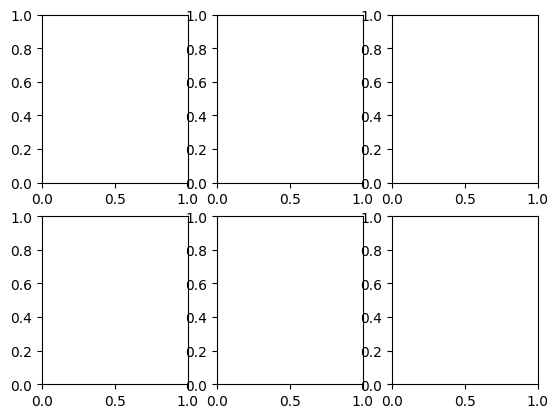

In [97]:
fig, axes = plt.subplots(2, 3)

In [98]:
axes

array([[<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

### Adjusting the spacing around subplots

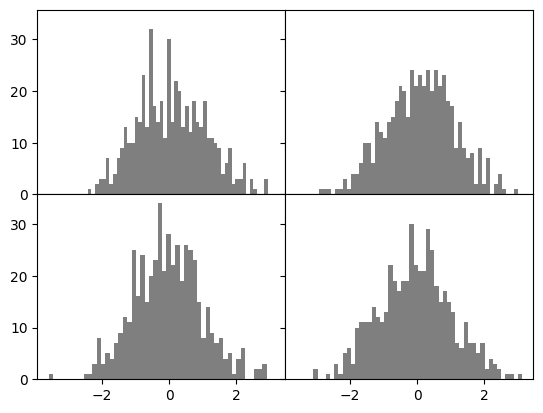

In [18]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.standard_normal(500), bins=50, color="black", alpha=0.5)
fig.subplots_adjust(wspace=0, hspace=0)

## Colors, Markers, and Line Styles

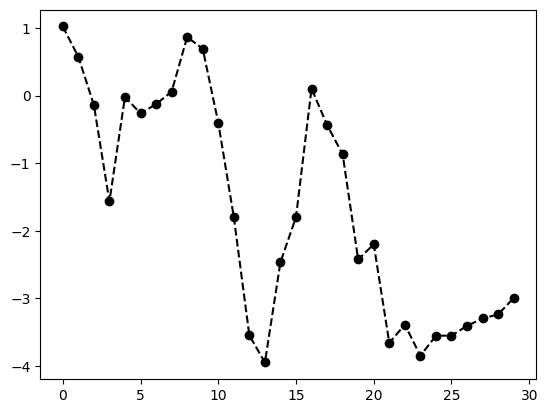

In [69]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(np.random.standard_normal(30).cumsum(), color="black", linestyle="dashed", marker="o");

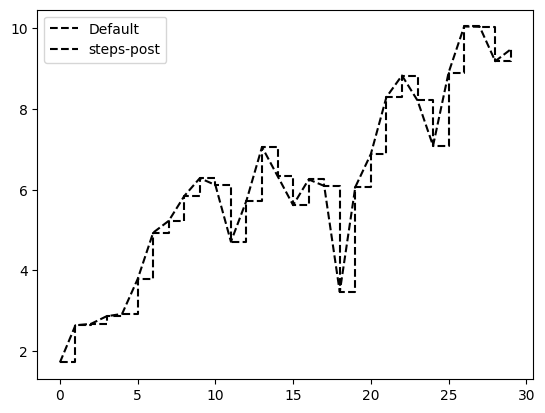

In [70]:
fig = plt.figure()
ax = fig.add_subplot()
data = np.random.standard_normal(30).cumsum()
ax.plot(data, color="black", linestyle="dashed", label="Default");
ax.plot(data, color="black", linestyle="dashed", drawstyle="steps-post", label="steps-post");
ax.legend()

### Ticks, Labels, and Legends

#### Setting the title, axis labels, and tick labels

Text(0.5, 1.0, 'My first matplotlib plot')

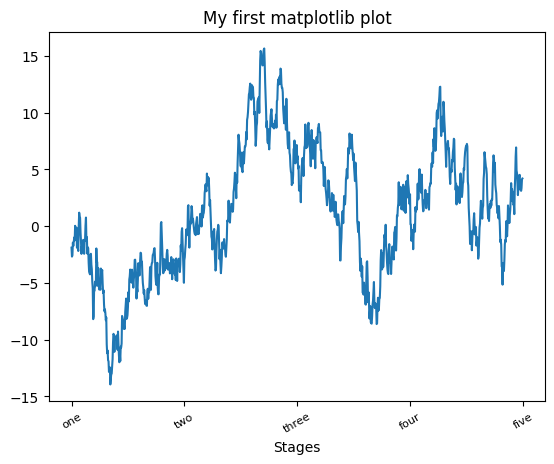

In [73]:
fig, ax = plt.subplots()
ax.plot(np.random.standard_normal(1000).cumsum())
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(["one", "two", "three", "four", "five"],
                           rotation=30, fontsize=8)
ax.set_xlabel("Stages")
ax.set_title("My first matplotlib plot")

#### Adding legends

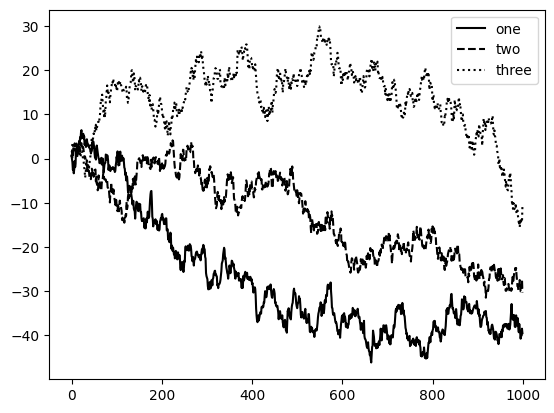

In [77]:
fig, ax = plt.subplots()
ax.plot(np.random.randn(1000).cumsum(), color="black", label="one")
ax.plot(np.random.randn(1000).cumsum(), color="black", linestyle="dashed", label="two")
ax.plot(np.random.randn(1000).cumsum(), color="black", linestyle="dotted", label="three")
ax.legend();

## Annotations and Drawing on a Subplot

In [79]:
# ex: of annotating
# ax.text(x, y, "Hello world!", family="monospace", fontsize=10)

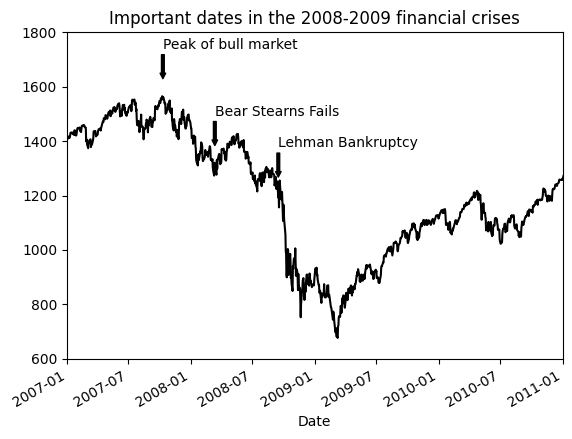

In [86]:
from datetime import datetime

fig, ax = plt.subplots()

data = pd.read_csv("/kaggle/input/spxexa/spx.csv", index_col=0, parse_dates=True)
spx = data["SPX"]

spx.plot(ax=ax, color="black")

crisis_data = [
    (datetime(2007, 10, 11), "Peak of bull market"),
    (datetime(2008, 3, 12), "Bear Stearns Fails"),
    (datetime(2008, 9, 15), "Lehman Bankruptcy")
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
               xytext=(date, spx.asof(date) + 225),
               arrowprops=dict(facecolor="black", headwidth=4, width=2, headlength=4),
               horizontalalignment="left", verticalalignment="top")
    
# Zoom in on 2007-2010
ax.set_xlim(["1/1/2007", "1/1/2011"])
ax.set_ylim([600, 1800])

ax.set_title("Important dates in the 2008-2009 financial crises");

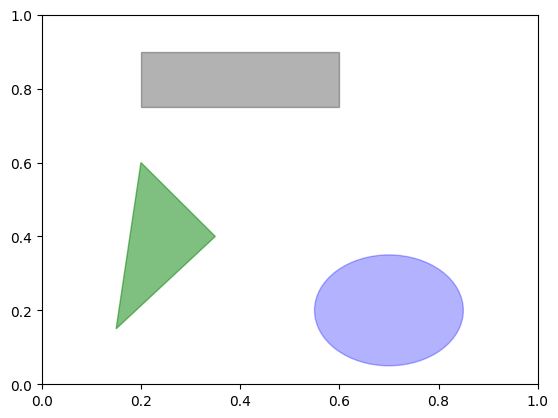

In [88]:
fig, ax = plt.subplots()

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color="black", alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color="blue", alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                  color="green", alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon);

## Saving Plots to File

In [99]:
# fig.savefig("figpath.png", dpi=400)

<h3><i>Table 9-2. Some fig.savefig options</i></h3>
<table>
    <tr>
        <th style="text-align:left;">Argument</th><th style="text-align:left;">Description</th>
    </tr>
    <tr>
        <td>fname</td> <td>String containing a filepath or a Python file-like object. The figure format is inferred from the file extension (e.g., .pdf for PDF or .png for PNG)</td>
    </tr>
    <tr>
        <td>dpi</td> <td>The figure resolution in dots per inch; defualts to 100 in IPython or 72 in Jupyter out of the box but can be configured</td>
    </tr>
    <tr>
        <td>facecolor, edgecolor</td> <td>The color of the figure background outside of the subplots; "w" (white), by default.</td>
    </tr>
    <tr>
        <td>format</td> <td>The explicit file format to use ("png", "pdf", "svg", "ps", "eps",...).</td>
    </tr>
</table>

## matplotlib Configuration

In [100]:
# plt.rc("figure", figsize=(10, 10))
# Sets the global default figure size to 10 X 10

In [101]:
# plt.rcdefaults()
# Sets/Restores defaults

In [102]:
# convenient way o write down the option in your program is as a dictionary:
# plt.rc("font", family="monospace", weight="bold", size=8)

# 9.2 Plotting with pandas and seaborn

## Line Plots

<Axes: >

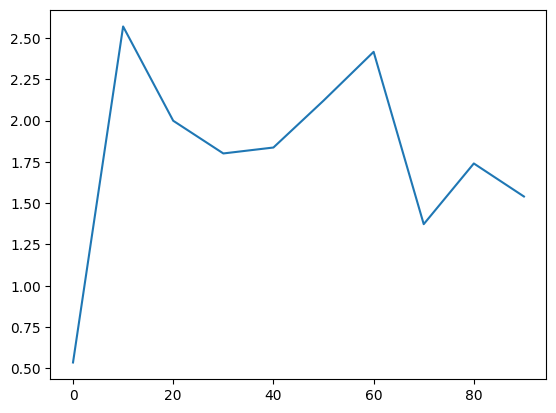

In [107]:
s = pd.Series(np.random.standard_normal(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

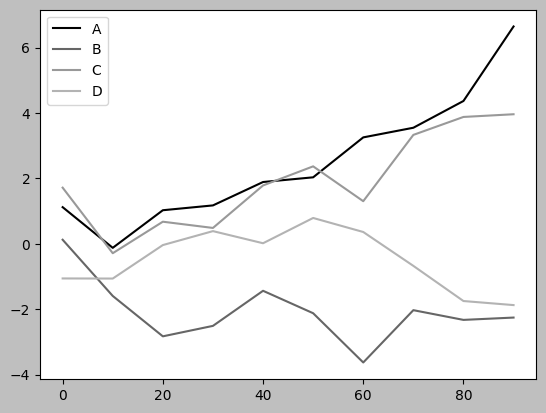

In [111]:
df = pd.DataFrame(np.random.standard_normal((10, 4)).cumsum(0),
                 columns=["A", "B", "C", "D"],
                 index=np.arange(0, 100, 10))

plt.style.use('grayscale')
df.plot();

## Bar Plots

<Axes: >

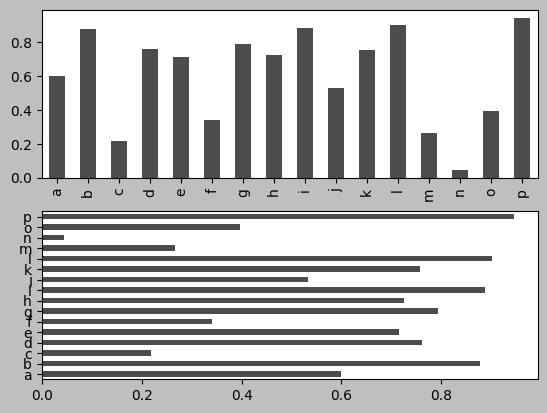

In [115]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.uniform(size=16), index=list("abcdefghijklmnop"))

data.plot.bar(ax=axes[0], color="black", alpha=0.7)
data.plot.barh(ax=axes[1], color="black", alpha=0.7)

In [116]:
df = pd.DataFrame(np.random.uniform(size=(6, 4)),
                 index=["one", "two", "three", "four", "five", "six"],
                 columns=pd.Index(["A", "B", "C", "D"], name="Genus"))

In [117]:
df

Genus,A,B,C,D
one,0.751711,0.987738,0.800130,0.126229
two,0.140435,0.453521,0.589847,0.098425
three,0.283964,0.732609,0.048754,0.399623
four,0.136308,0.320760,0.811836,0.766478
five,0.430954,0.052225,0.214764,0.573699
six,0.122850,0.365695,0.439166,0.899361


<Axes: >

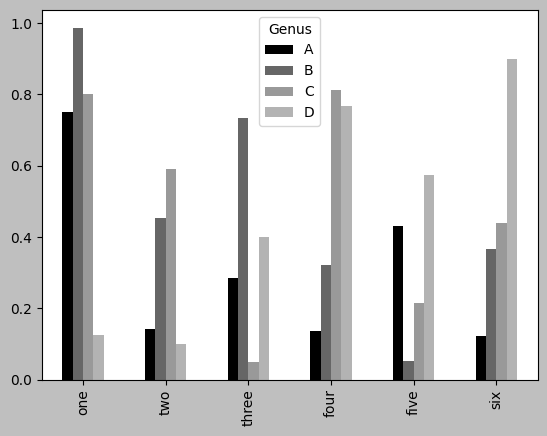

In [118]:
df.plot.bar()

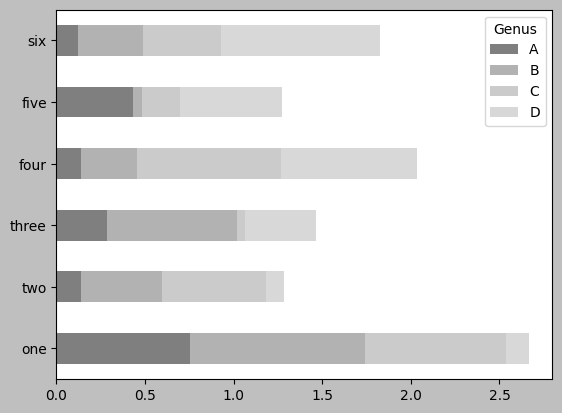

In [120]:
df.plot.barh(stacked=True, alpha=0.5);

In [121]:
tips = pd.read_csv("/kaggle/input/tipsdata/tips.csv")

In [122]:
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [123]:
party_counts = pd.crosstab(tips["day"], tips["size"])

In [126]:
party_counts = party_counts.reindex(index=["Thur", "Fri", "Sat", "Sun"])

In [127]:
party_counts

size,1,2,3,4,5,6
day,,,,,,
Thur,1,48,4,5,1,3
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1


In [128]:
party_counts = party_counts.loc[:, 2:5]

In [129]:
# Normalize to sum to 1
party_pcts = party_counts.div(party_counts.sum(axis="columns"), axis="index")

In [130]:
party_pcts

size,2,3,4,5
day,,,,
Thur,0.827586,0.068966,0.086207,0.017241
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000


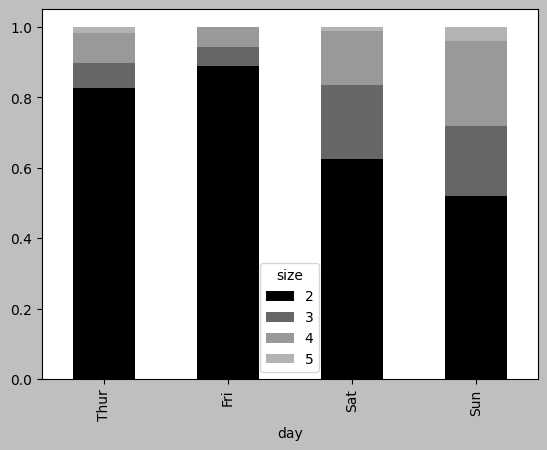

In [133]:
party_pcts.plot.bar(stacked=True);

In [134]:
import seaborn as sns

In [135]:
tips["tip_pct"] = tips["tip"] / (tips["total_bill"] - tips["tip"])

In [136]:
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


<Axes: xlabel='tip_pct', ylabel='day'>

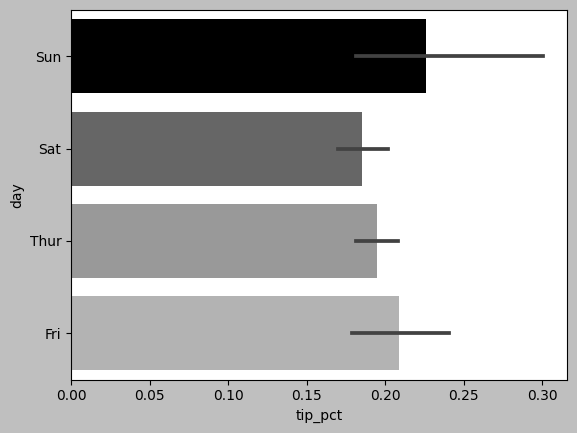

In [137]:
sns.barplot(x="tip_pct", y="day", data=tips, orient="h")

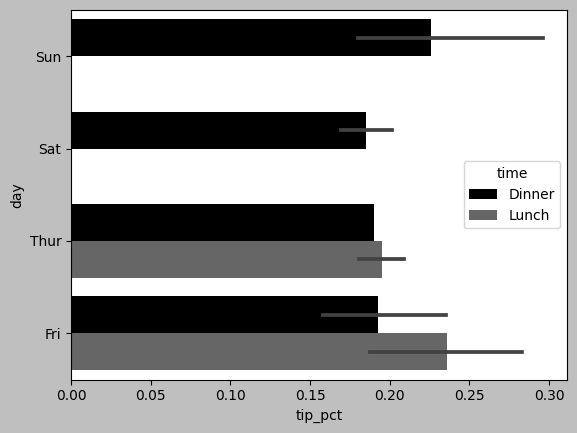

In [139]:
sns.barplot(x="tip_pct", y="day", hue="time", data=tips, orient="h");

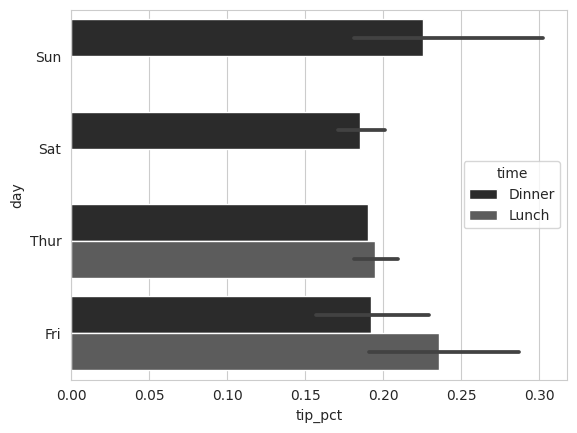

In [146]:
# sns.set_palette("Greys_r")
# sns.set_style("whitegrid")
sns.barplot(x="tip_pct", y="day", hue="time", data=tips, orient="h");

## Histograms and Density Plots

<Axes: ylabel='Frequency'>

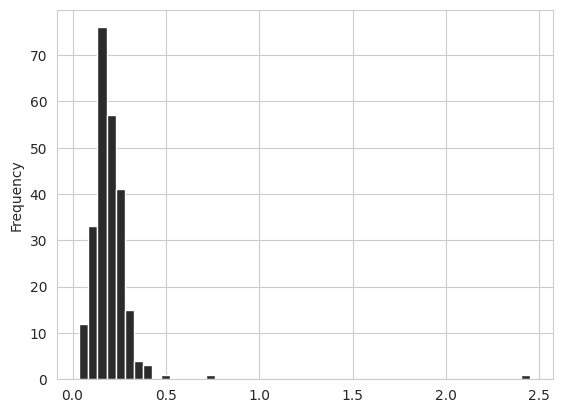

In [147]:
tips["tip_pct"].plot.hist(bins=50)

<Axes: ylabel='Density'>

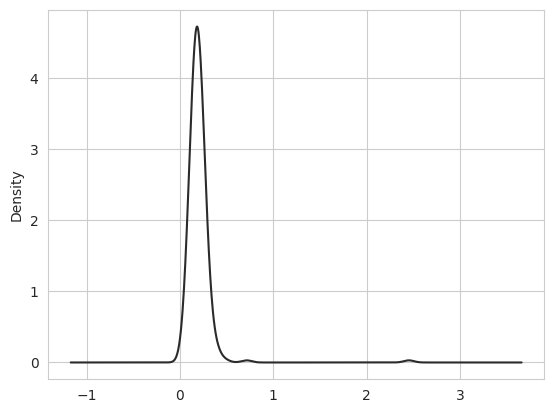

In [149]:
tips["tip_pct"].plot.density()

<Axes: ylabel='Count'>

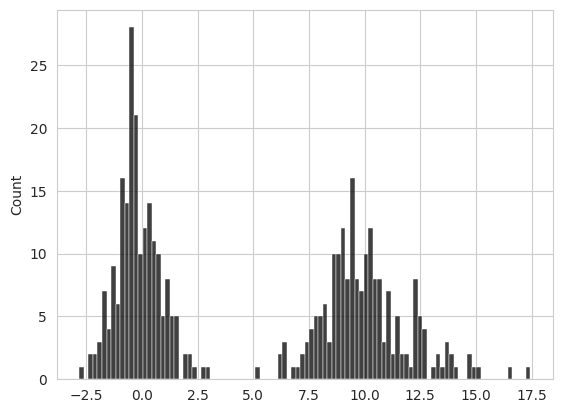

In [150]:
comp1 = np.random.standard_normal(200)
comp2 = 10 + 2 * np.random.standard_normal(200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.histplot(values, bins=100, color="black")

## Scatter or Point Plots

In [152]:
macro = pd.read_csv("/kaggle/input/macrodata/macrodata.csv")

In [153]:
data = macro[["cpi", "m1", "tbilrate", "unemp"]]
trans_data = np.log(data).diff().dropna()

In [154]:
trans_data.tail()

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


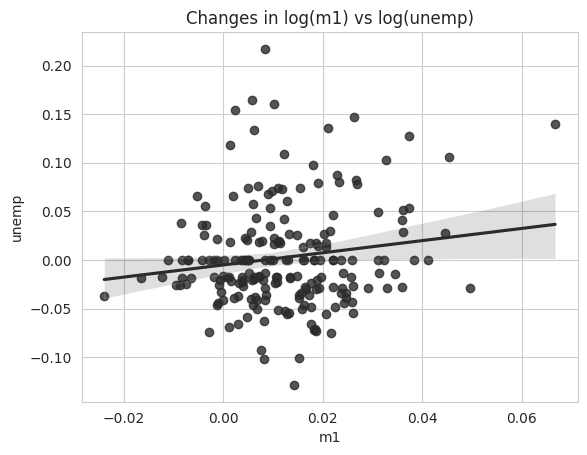

In [162]:
ax = sns.regplot(x="m1", y="unemp", data=trans_data).set(title="Changes in log(m1) vs log(unemp)")

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


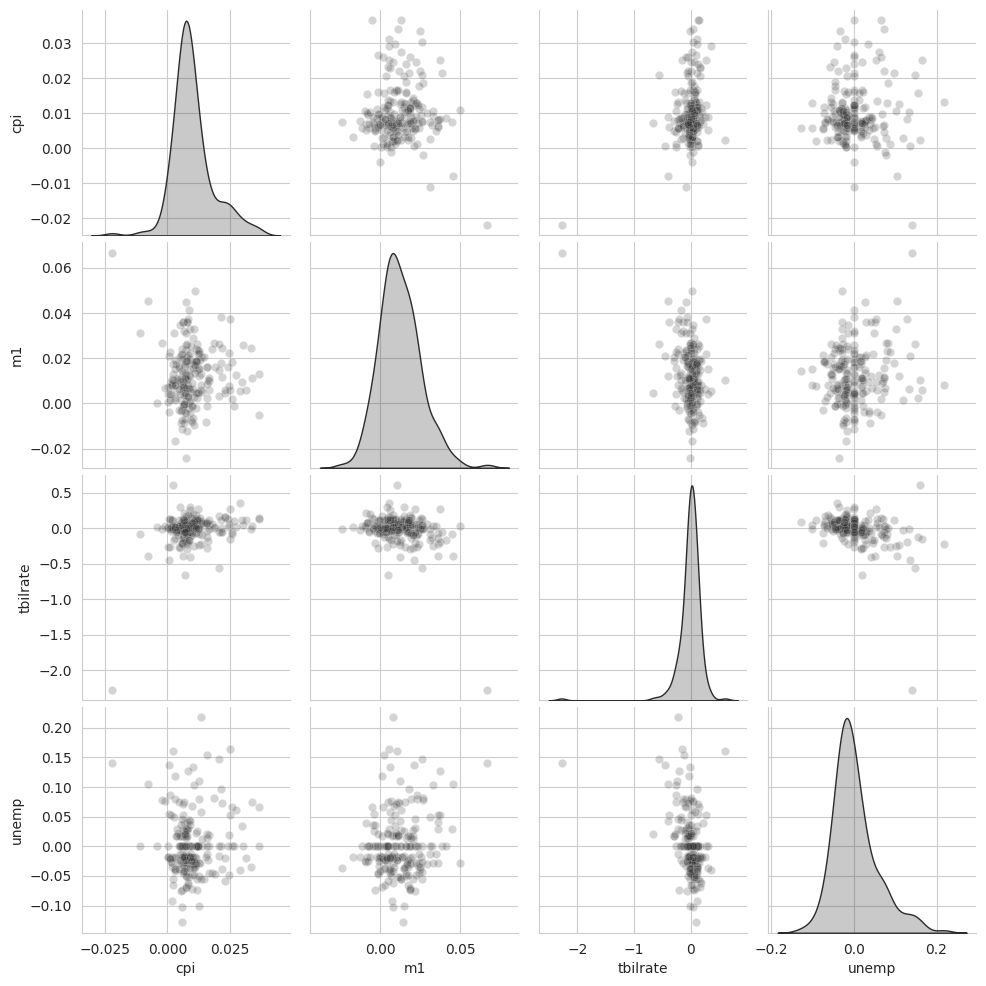

In [163]:
sns.pairplot(trans_data, diag_kind="kde", plot_kws={"alpha": 0.2})

## Facet Grids and Categorical Data

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


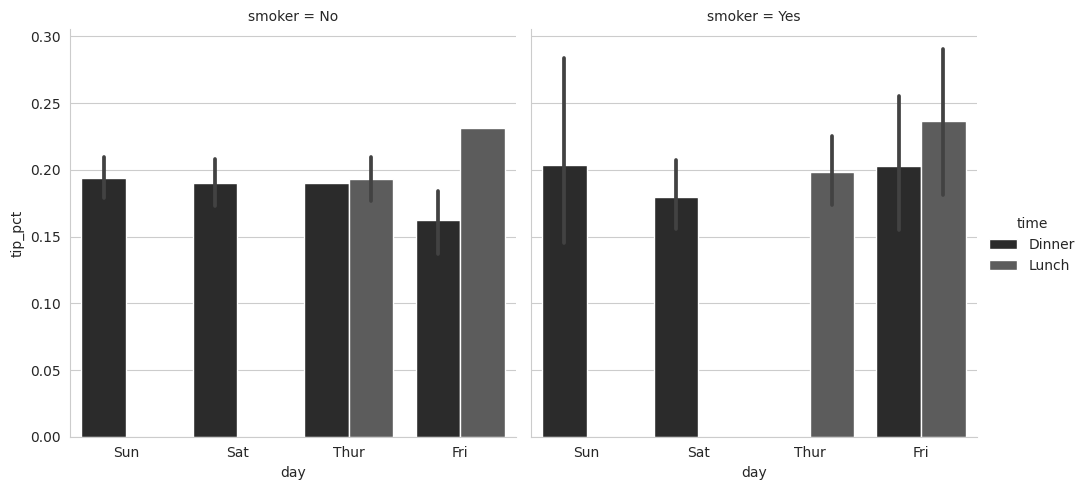

In [164]:
sns.catplot(x="day", y="tip_pct", hue="time", col="smoker", kind="bar", data=tips[tips.tip_pct < 1])

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


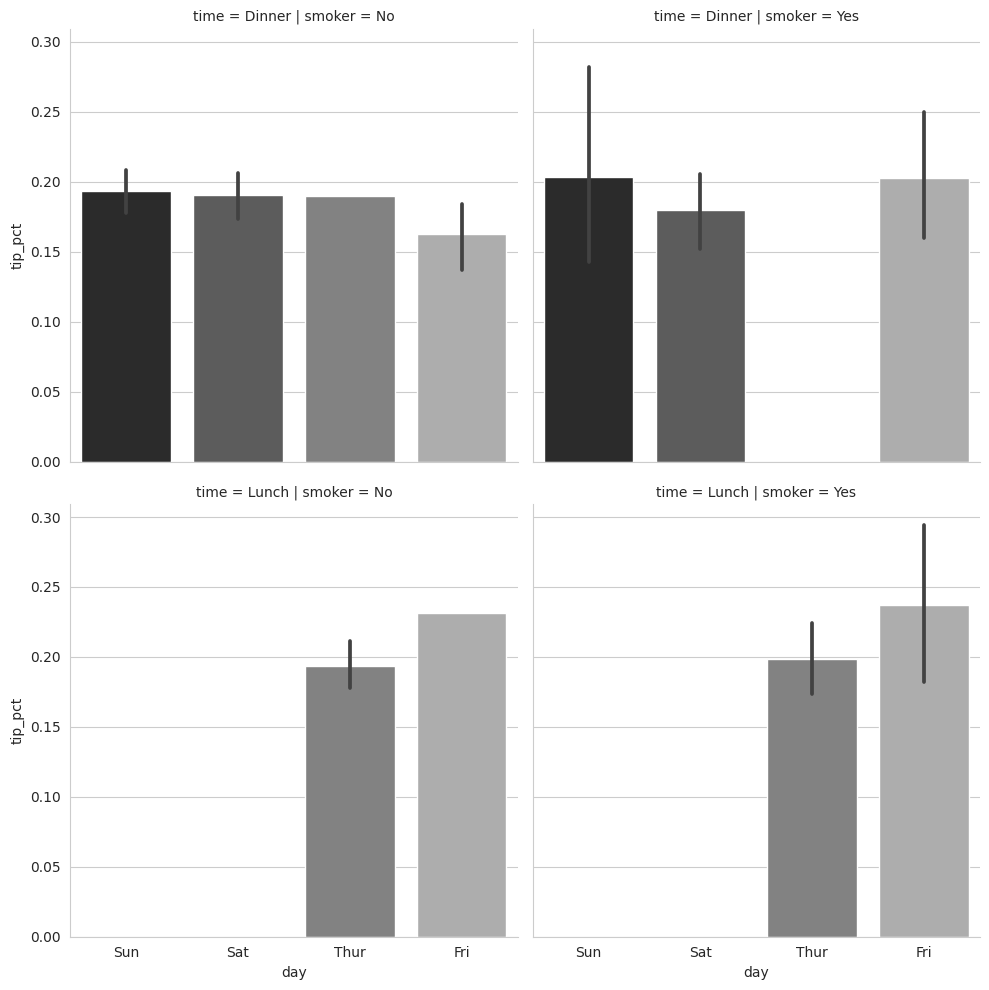

In [167]:
sns.catplot(x="day", y="tip_pct", row="time", col="smoker", kind="bar", data=tips[tips.tip_pct < 1])

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


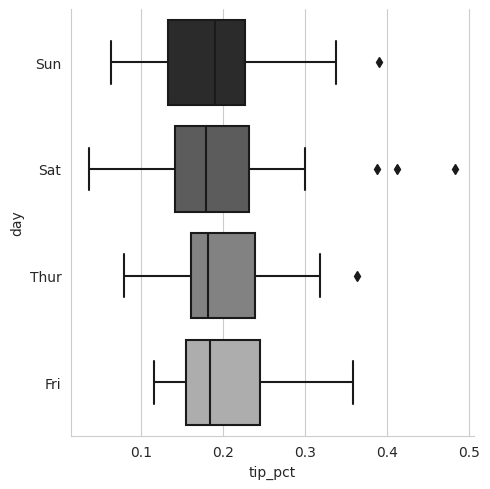

In [168]:
sns.catplot(x="tip_pct", y="day", kind="box", data=tips[tips.tip_pct < 0.5])